# Predictive Analytics : Loan Approval Prediction

## Business Understanding

### Problem Statements
- Bagaimana cara menentukan kelayakan persetujuan pinjaman secara otomatis untuk mengurangi waktu proses dan meminimalkan risiko kredit macet?
- Faktor apa saja yang paling berpengaruh dalam menentukan apakah pinjaman layak disetujui?

### Goals
- Mengembangkan model prediksi yang mampu menentukan status persetujuan pinjaman dengan akurasi tinggi.
- Mengidentifikasi faktor-faktor yang memengaruhi kelayakan pinjaman sehingga dapat digunakan untuk mengoptimalkan proses persetujuan.

### Solution Statements
- Membangun model machine learning untuk klasifikasi persetujuan pinjaman.
- Menganalisis variabel yang ada di dalam dataset untuk menemukan fitur-fitur yang paling berpengaruh dalam keputusan persetujuan pinjaman.

## Data Understanding
Dataset Loan Approval yang berasal dari kaggle merupakan sebuah dataset sintetis yang berdasarkan dari [(Sumber Utama)](https://www.kaggle.com/datasets/laotse/credit-risk-dataset). Dataset Loan Approval memiiliki 45000 records dengan 14 variabel, dengan rincian sebagai berikut:



## Data Understanding
Pada tahap ini dilakukan proses analisis untuk memahami dataset secara mendalam

### Data Loading

#### Import Library

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv("/content/loan_data.csv")

In [31]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### Exploratory Data Analysis
Pada tahap ini dilakukan analisis untuk data yang ada di dalam dataset seperti dilihat

In [32]:
data.shape

(45000, 14)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Output di atas menunjukkan bahwa dataset memiliki 45000 data dan 14 kolom.
- Terdapat 6 tipe data float64
- Terdapat 3 tipe data int64
- Terdapat 5 tipe data object

In [34]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Fungsi describe digunakan untuk memberikan informasi statistik.

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum.
- 25% adalah kuartil pertama.
- 50% adalah kuartil kedua.
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [35]:
unique_ages = data['person_age'].unique()
print(unique_ages)


[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]


Dapat dilihat pada output di atas, dataset memiliki data untuk umur pengguna dengan rentang 21 hingga 144 dimana umur 144 hampir tidak mungkin terjadi di dunia nyata. Oleh karena itu, dijadikan acuan untuk umur loan approval adalah 21 - 65 tahun seperti dibawah ini

In [36]:
data_fixed = data[data['person_age'] <= 65]

In [37]:
data_fixed.shape

(44961, 14)

#### Handling Missing Value

In [38]:
print("Total Data Duplikat:",data.duplicated().sum())

Total Data Duplikat: 0


In [39]:
data_fixed.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Dapat dilihat dari hasil di atas bahwa dataset tidak memiliki data duplikat dan missing value. Oleh karena itu, proses dapat dilanjutkan kepada visualisasi data

#### Boxplot Visualization

In [40]:
categorical_feature = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file"
]

numerical_feature = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score"
]

Untuk mempermudah visualisasi data, maka di feature dibagi menjadi categorical_feature dan numerical_feature

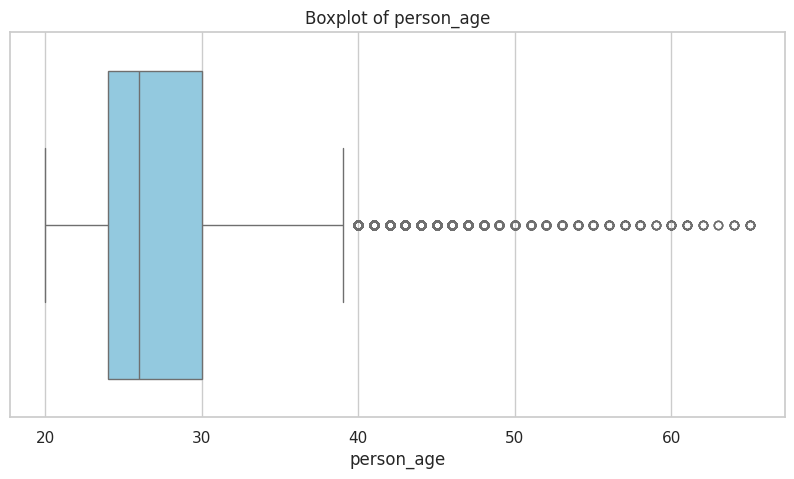

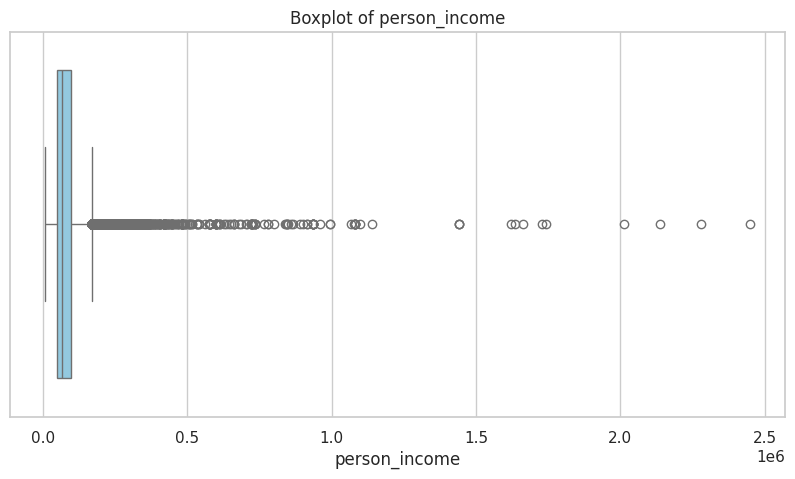

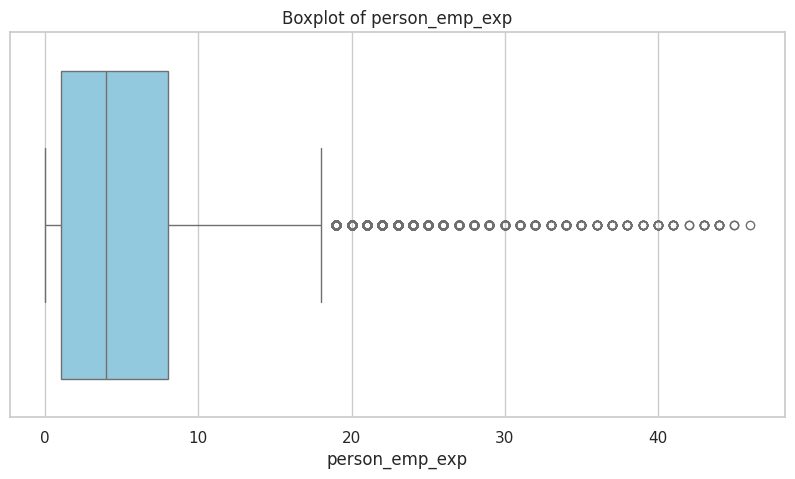

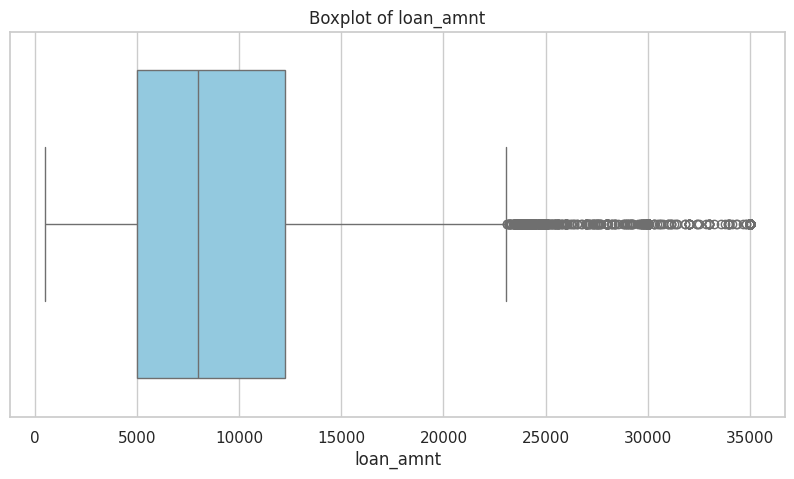

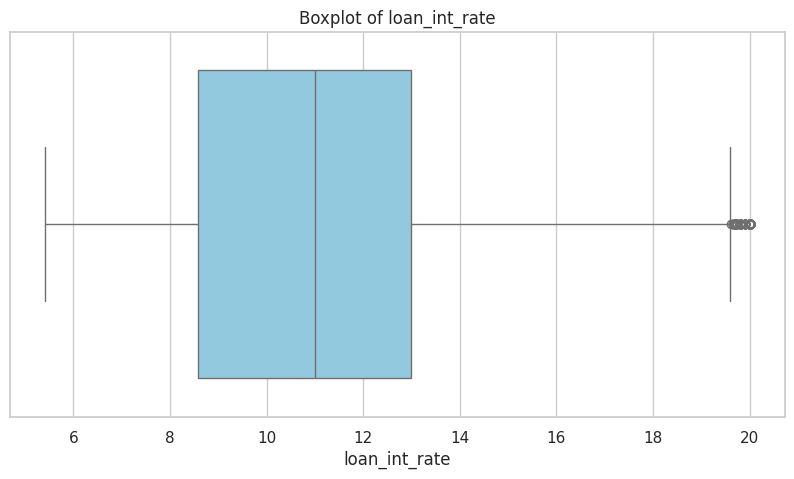

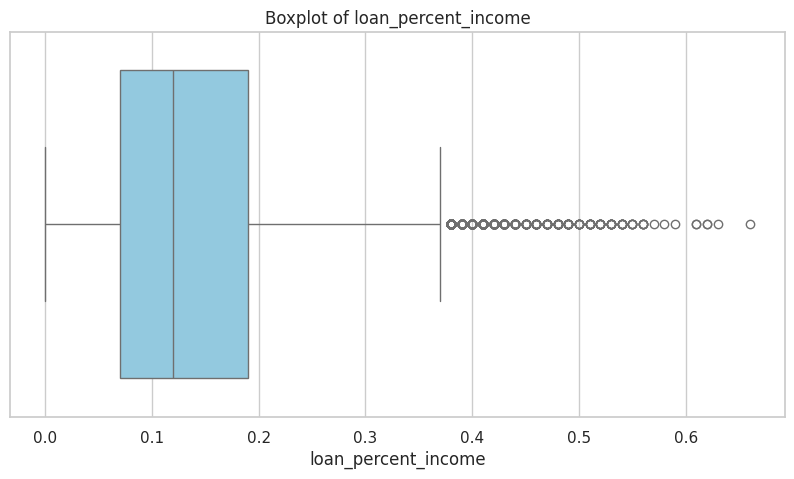

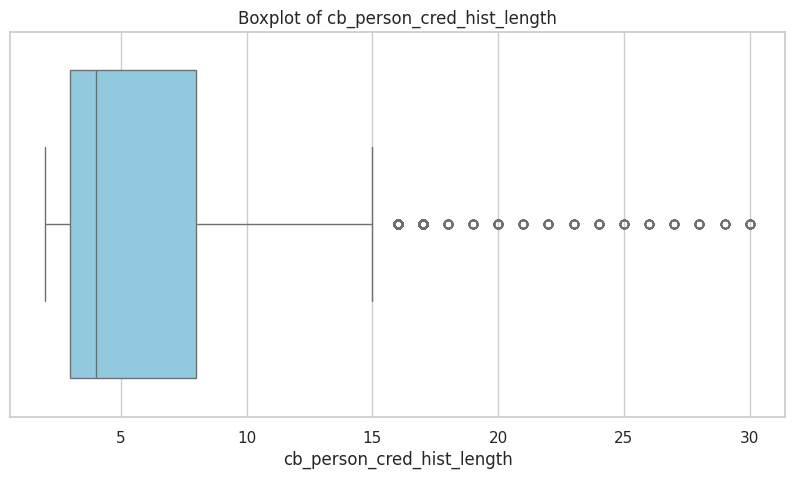

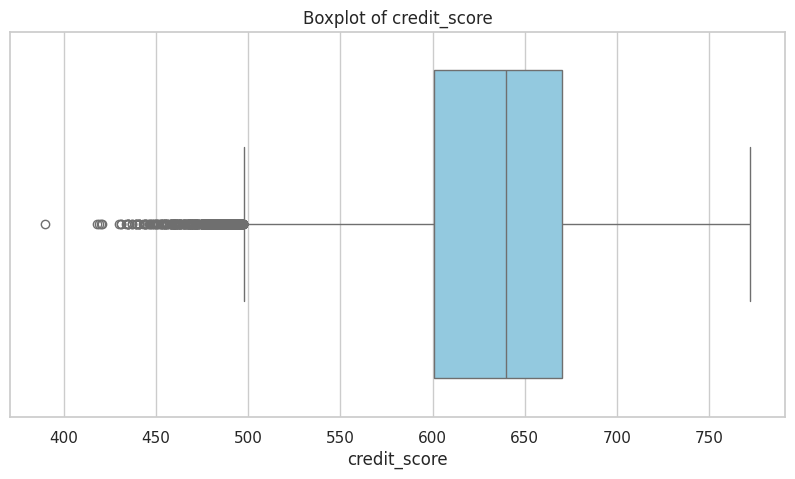

In [41]:
for num in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data_fixed, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

Untuk rata-rata distribusi box plot dapat dilihat sebagai berikut:
- person_age : rata-rata penggunaan loan_approval yaitu dari 23-28 tahun.
- person_income : rata-rata pengguna loan approval memiliki income sebesar 45000 - 85000.
- person_emp_exp : rata-rata pengalaman pekerjaan yang dimiliki oleh pengaju loan_approval adalah 1-7 tahun.
- loan_amnt : rata-rata pinjaman yang diminta yaitu 5000-13000
- loan_int_rate : rata-rata suku bunga pinjaman yang dimiliki berada pada angka 8.5-13
- loan_percent_income : rata-rata dari persentase pendapatan tahunan berada pada angka 0.07 - 0.18
- cb_person_cred_hist_length : rata-rata lama riwayat kredit yaitu 3 - 7 tahun
- credit_score : rata-rata skor kredit pengaju loan yaitu 600 - 660.

### EDA - Univariate Analysis

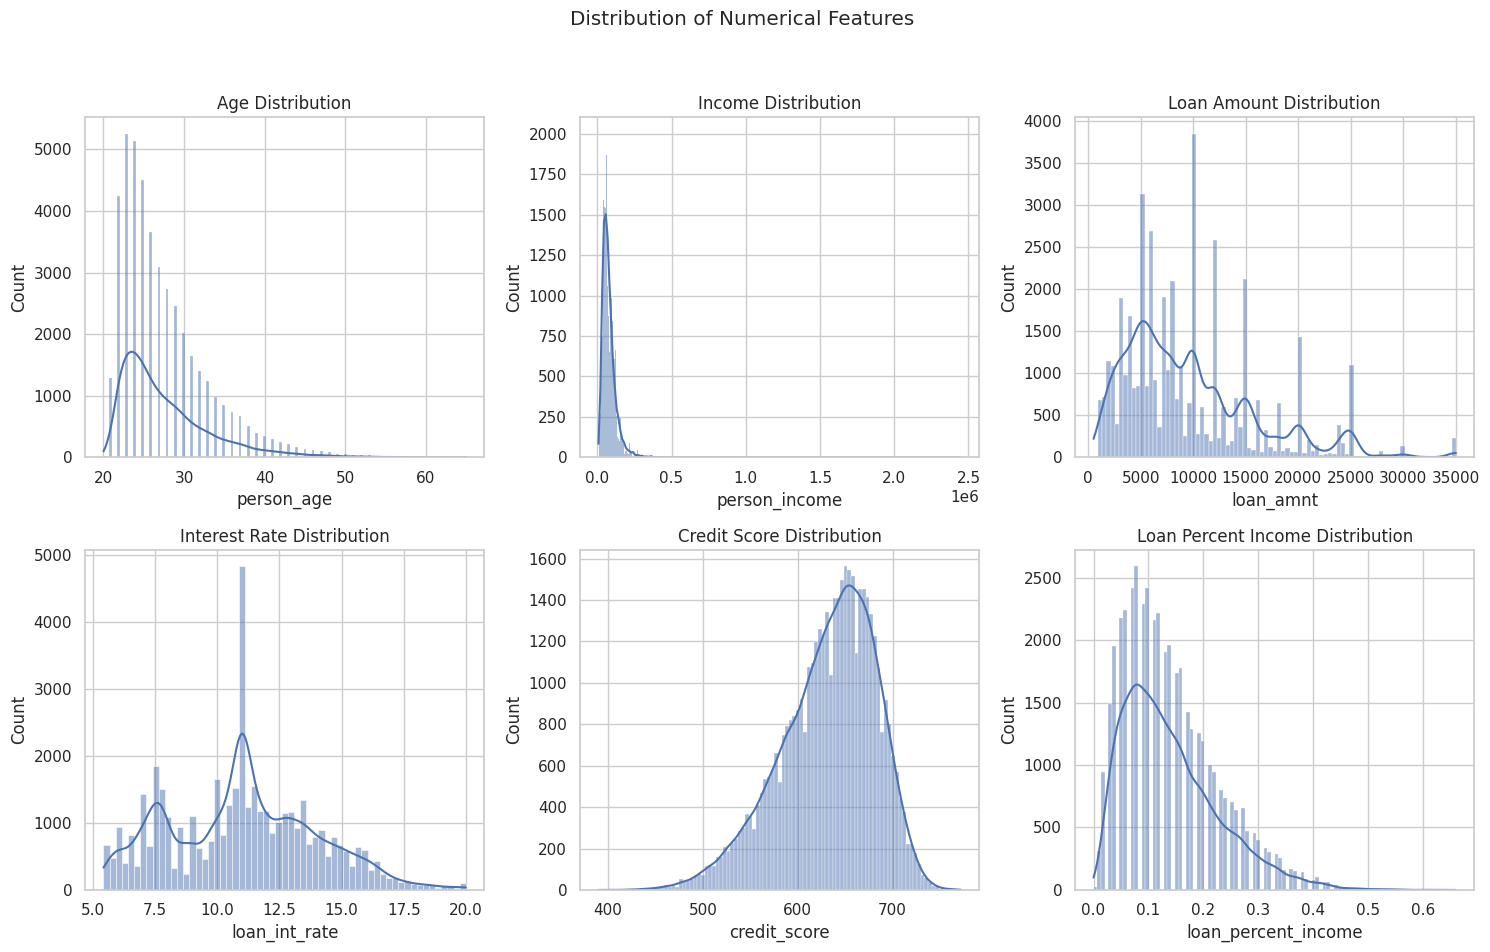

In [42]:
# Univariate Analysis - Numerical Feature

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features')

# Age
sns.histplot(data_fixed['person_age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Income
sns.histplot(data_fixed['person_income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

# Loan amount
sns.histplot(data_fixed['loan_amnt'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount Distribution')

# Interest rate
sns.histplot(data_fixed['loan_int_rate'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate Distribution')

# Credit score
sns.histplot(data_fixed['credit_score'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Credit Score Distribution')

# Loan percent income
sns.histplot(data_fixed['loan_percent_income'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Loan Percent Income Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- person_age : Distribusi dari umur memiliki angka tertinggi pada 23-24 tahun.
- person_income : Distribusi pendapatan pengaju memiliki angka terbanyak pada jangka 40000-70000
- loan_amnt : Distribusi permintaan loan memiliki angka tertinggi pada 500 dan 10000.
- loan_int_rate : Distribusi suku bunga pinjaman memiliki angka tertinggi pada angka 11
- credit_score : Distribusi skor kredit terdapat pada jangka angka 600-700.
- loan_percent_income: Distribusi jumlah pinjaman sebagai persentase dari pendapat tahunan memiliki angka tertinggi pada 0.05 - 0.15.

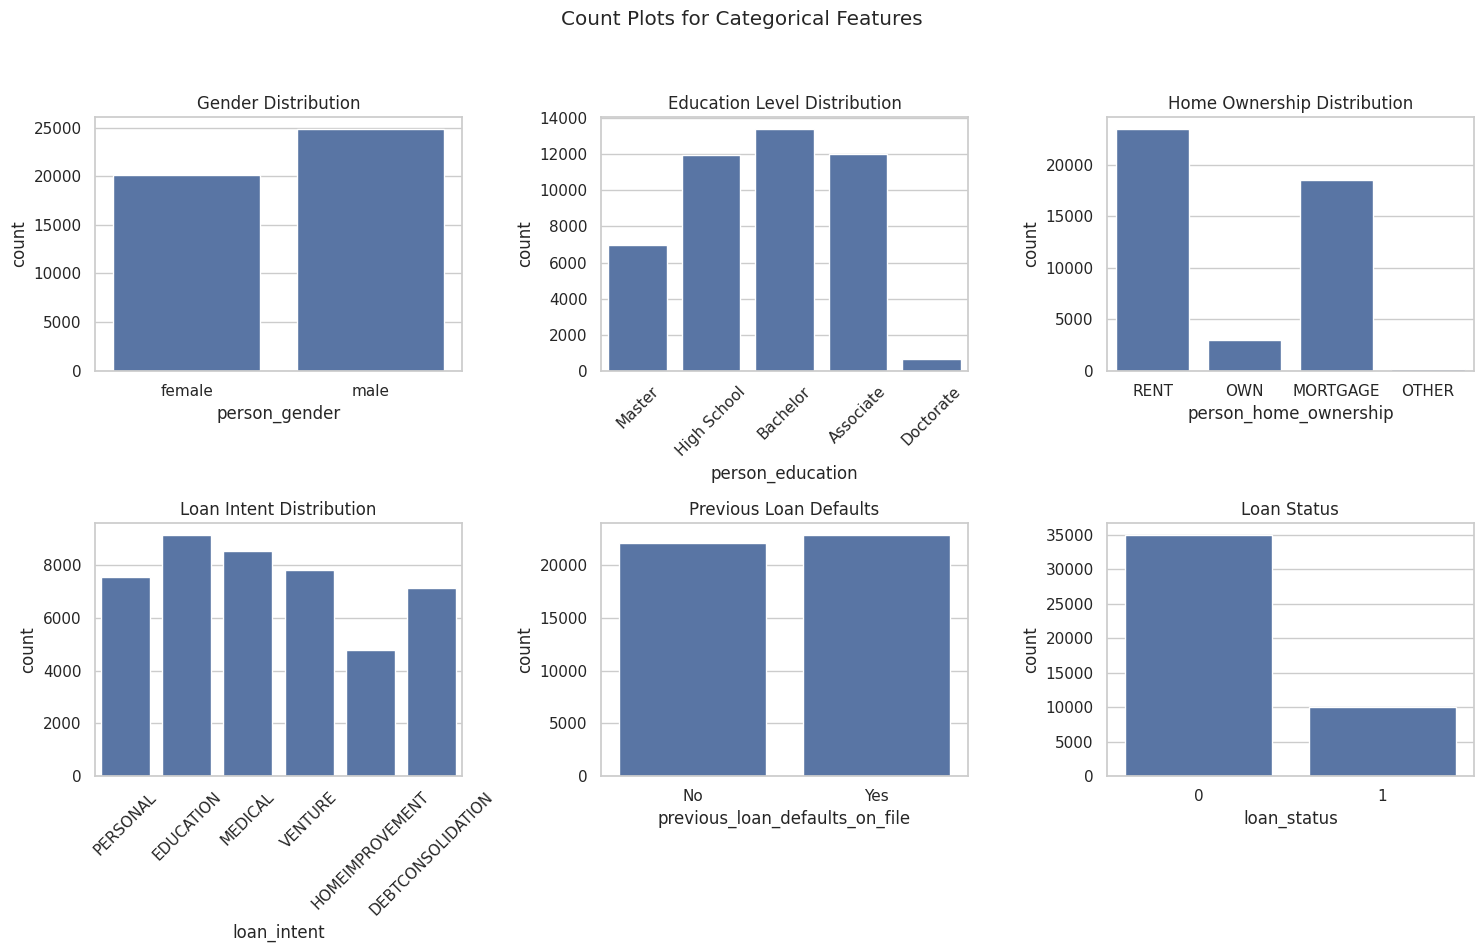

In [43]:
# Univariate Analysis - Multivariate analysis

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Count Plots for Categorical Features')

# Gender
sns.countplot(data=data_fixed, x='person_gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Education level
sns.countplot(data=data_fixed, x='person_education', ax=axes[0, 1])
axes[0, 1].set_title('Education Level Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Home ownership
sns.countplot(data=data_fixed, x='person_home_ownership', ax=axes[0, 2])
axes[0, 2].set_title('Home Ownership Distribution')

# Loan intent
sns.countplot(data=data_fixed, x='loan_intent', ax=axes[1, 0])
axes[1, 0].set_title('Loan Intent Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Previous loan
sns.countplot(data=data_fixed, x='previous_loan_defaults_on_file', ax=axes[1, 1])
axes[1, 1].set_title('Previous Loan Defaults')

# Loan status
sns.countplot(data=data_fixed, x='loan_status', ax=axes[1, 2])
axes[1, 2].set_title('Loan Status')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Feature yang memiliki variasi terbanyak yaitu pada person_education, person_home_ownership, dan loan_intent.
- person_education : Angka tertinggi yaitu pada Bachelor dan disusul dengan High School dan Associate.
- person_home_ownership : Rata-rata dari pengaju loan yaitu bertempat tinggal rent dan mortgage.
- loan_intent : Angka tertinggi pada pengaju loan yaitu untuk education dan medical.

#### EDA - Multivariate Analysis

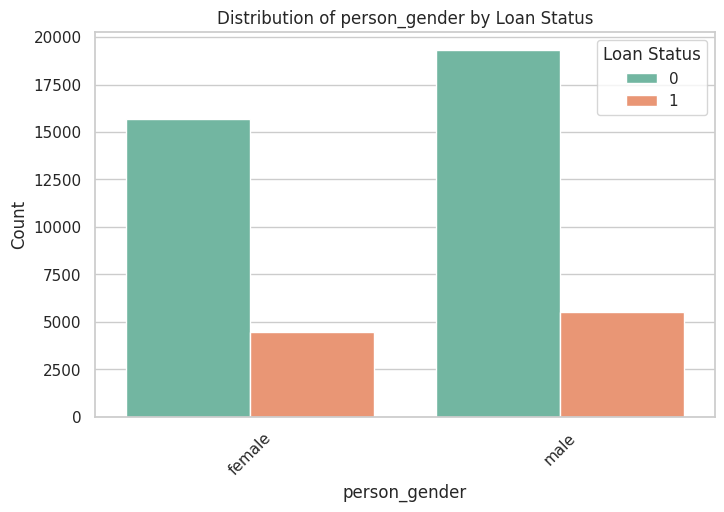

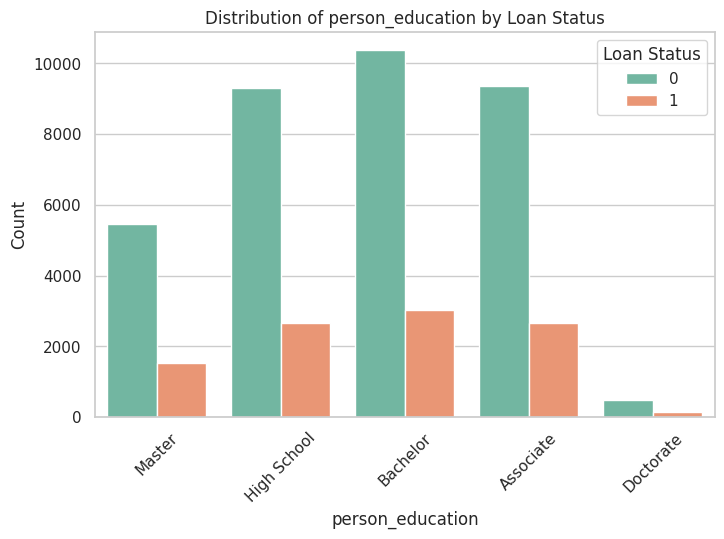

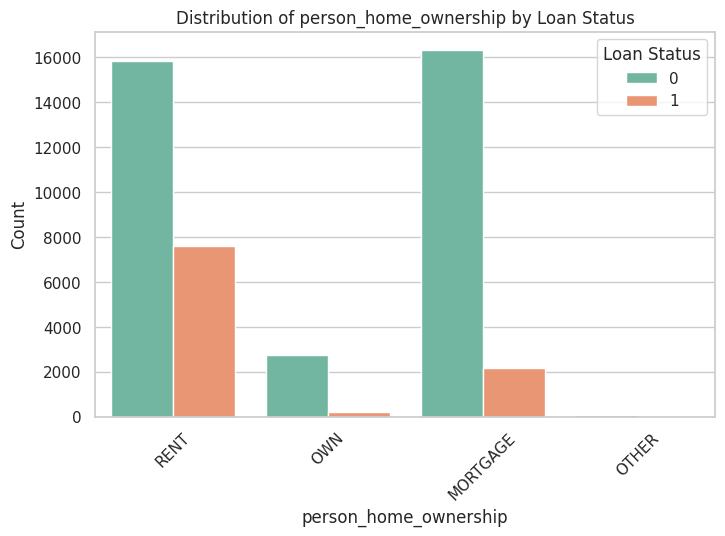

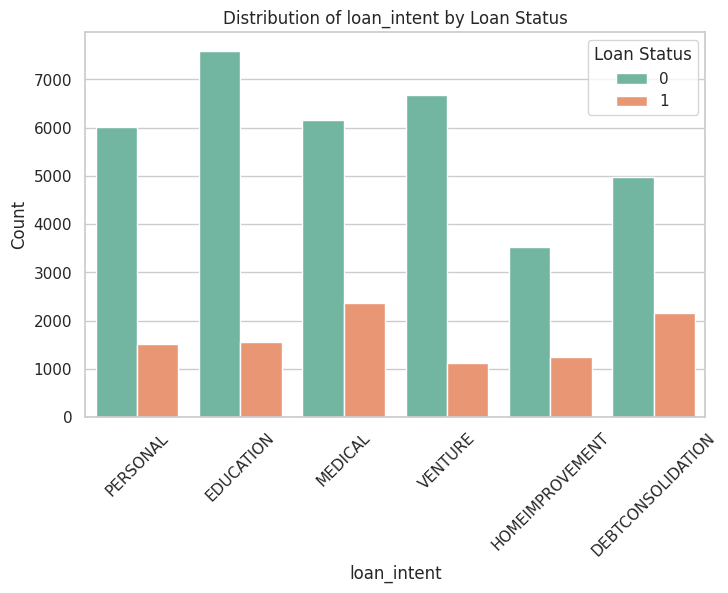

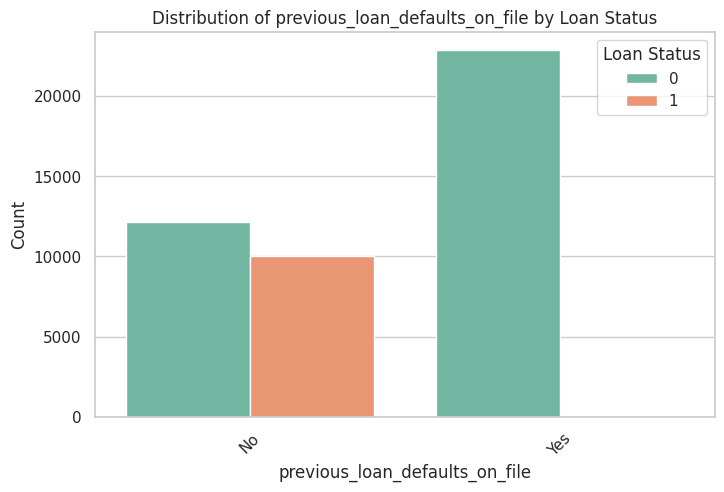

In [44]:
for col in categorical_feature:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data_fixed, x=col, hue='loan_status', palette='Set2')
    plt.title(f"Distribution of {col} by Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Loan Status", loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

- person_gender : Jenis kelamin tidak memiliki pengaruh besar dalam penerimaan pengajuan loan.
- person_education : Yang paling banyak diterima dalam pengajuan loan yaitu Bachelor yang kemudian disusul dengan High School dan Associate.
- loan_intent : Penerimaan loan paling banyak diterima untuk tujuan medical dan debtconsolidation
- previous_loan_default_on_file : Yang paling banyak diterima untuk pengajuan loan yaitu yang memiliki indikator peminjaman sebelumnya adalah "no".

#### Correlation Matrix

Visualisasi ini digunakan untuk mencari tahu feature apa saja yang memiliki korelasi paling besar.

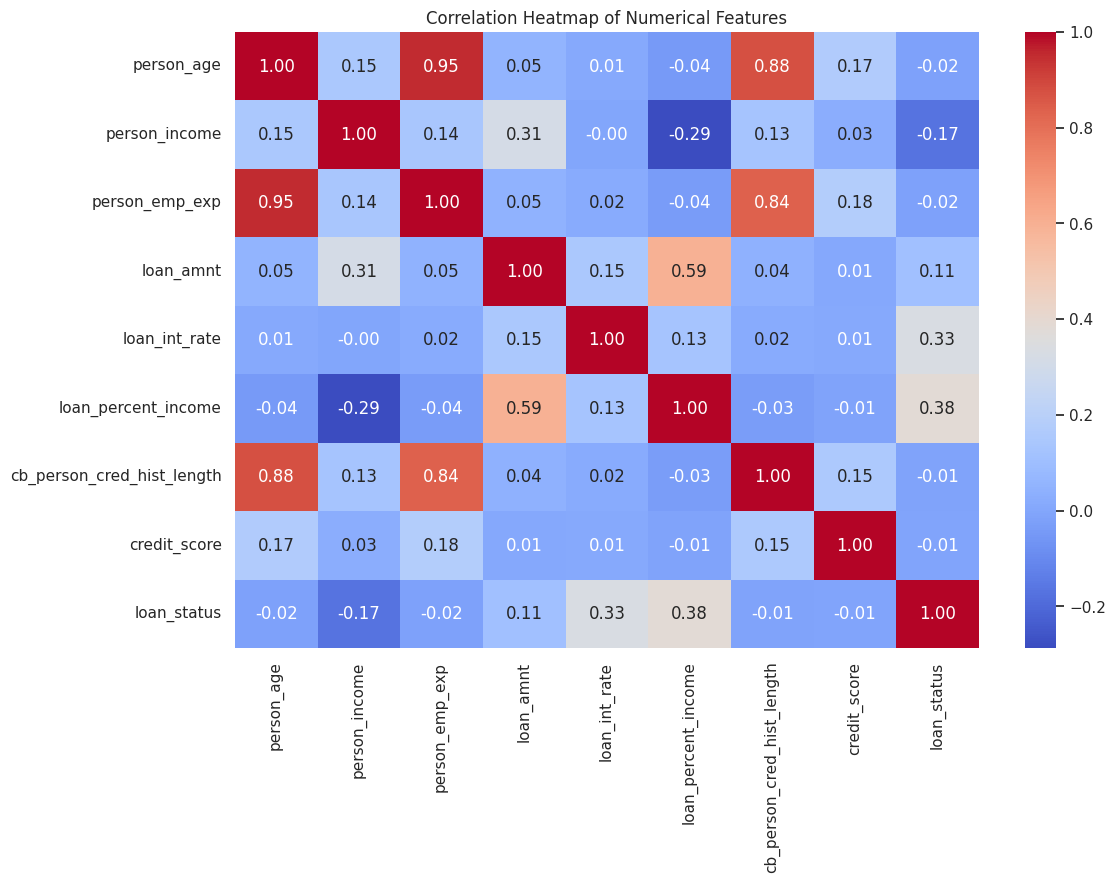

In [45]:
numeric_df = data_fixed.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()

# Heatmap correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Feature Numerik yang memiliki korelasi paling besar yaitu loan_int_rate dengan skor sebesar 0.33 dan loan_percent_income sebesar 0.38.

### Data Preparation
Teknik yang digunakan:
- Handling Outliers : Menghapus Outliers
- Label Encoding : Mengubah kategori menjadi tipe data numerik
- Train-test split data : Data dibagi menjadi 80% Train dan 20% Test

#### Handling Outliers

In [46]:
selected_cols = data_fixed[numerical_feature]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df = data_fixed[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

Pada tahap ini dilakukan filtering outliers yang bertujuan untuk menghapus outliers atau data-data yang berada diluar IQR karena akan memberikan hasil yang signifikan kepada model jika tidak dihapus.

```selected_cols = data_fixed[numerical_feature]```
Pada baris ini, kita memilih kolom numerik dari dataset ```data_fixed``` berdasarkan daftar ```numerical_feature```

```Q1 = selected_cols.quantile(0.25)```
```Q3 = selected_cols.quantile(0.75)```
```IQR = Q3 - Q1```

- Q1 (Kuartil 1): Nilai yang memisahkan 25% data terendah dari 75% data lainnya.
- Q3 (Kuartil 3): Nilai yang memisahkan 75% data terendah dari 25% data tertinggi.
- IQR (Interquartile Range): Rentang antara Q3 dan Q1. Ini mengukur sebaran nilai tengah dari data.

```df = data_fixed[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]```

- Nilai yang lebih kecil dari Q1-1.5 x IQR dianggap Outlier Bawah
- Nilai yang lebih besar dari Q3+1.5 x IQR dianggap Outlier Atas

```~```: Berguna untuk membalikkan hasil, memilih data yang tidak mengandung outliers.
```any(axis=1)```: Mengevaluasi apakah ada kolom dalam satu baris yang memenuhi kriteria outliers.



In [47]:
df.shape

(37549, 14)

Dapat dilihat setelah dilakukan filter untuk outliers menjadi 37549 data. Hasil Boxplot setelah difilter dapat dilihat di bawah ini.

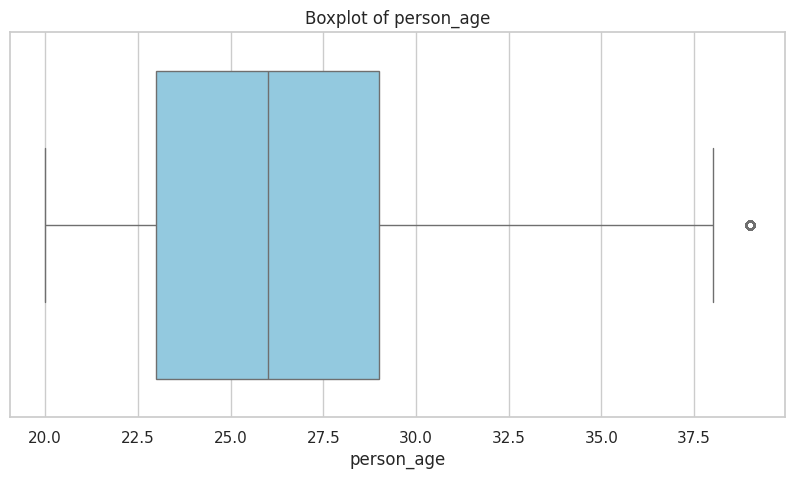

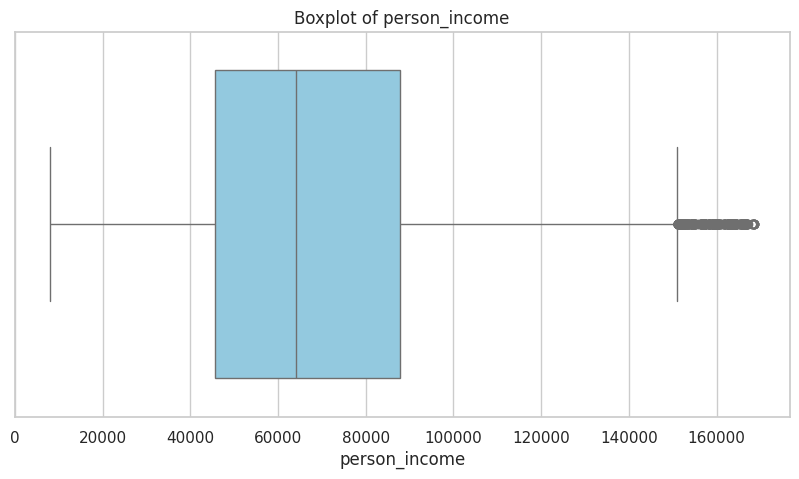

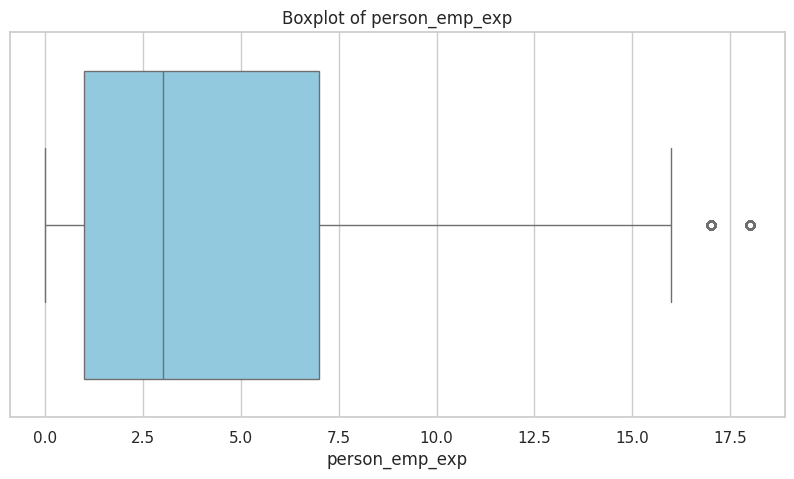

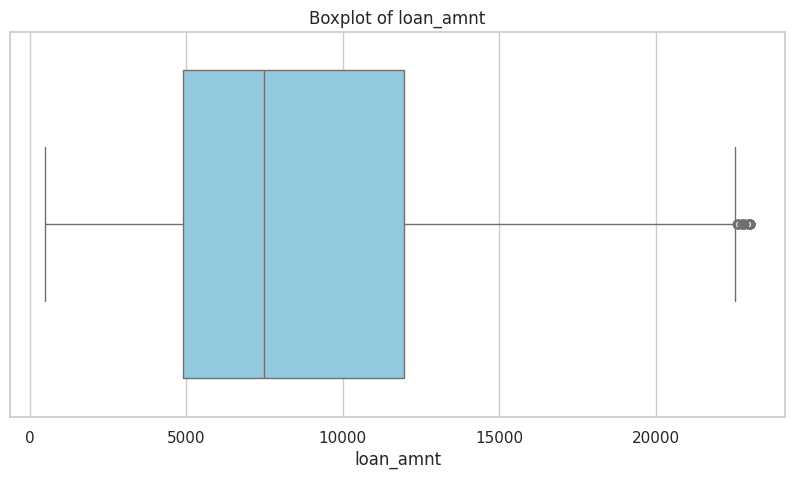

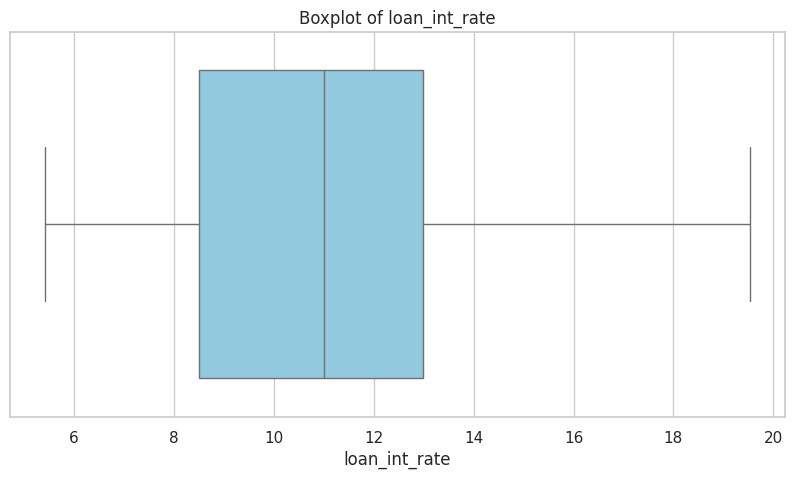

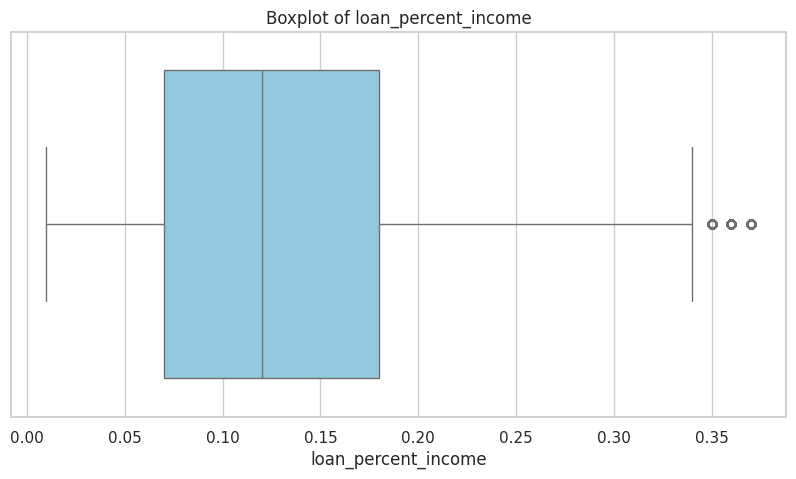

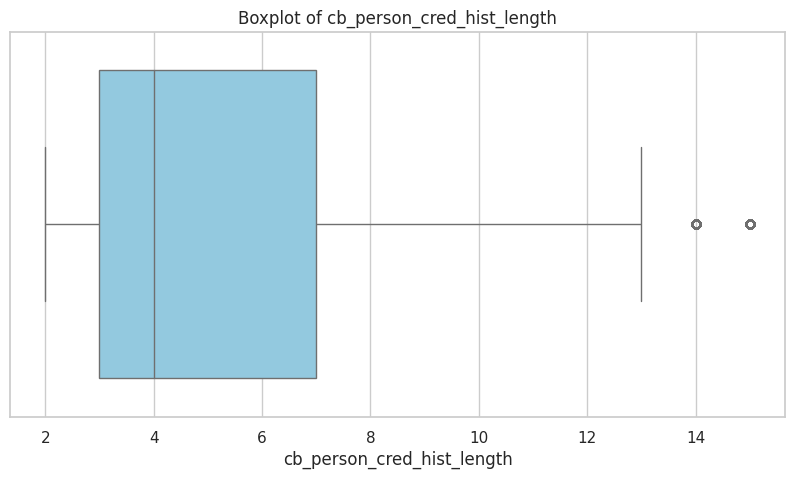

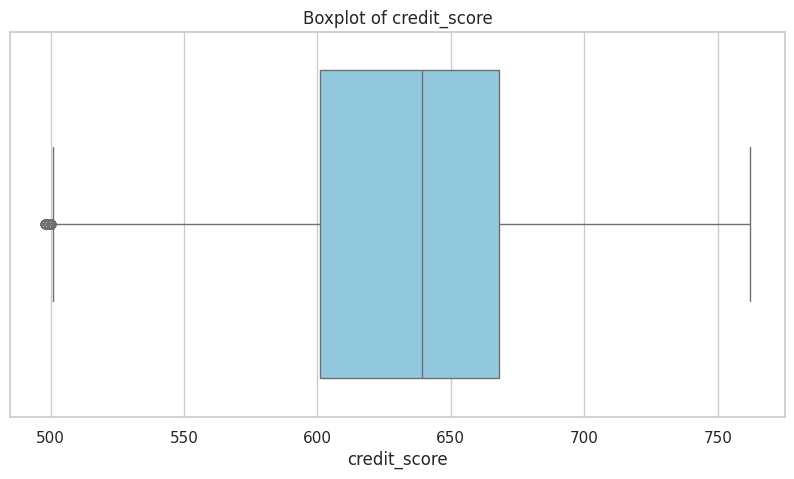

In [48]:
for num in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

#### Label Encoding

In [49]:
data_encoded = df.copy()

label_encoder = LabelEncoder()
for column in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

Untuk feature categorical seperti umur, edukasi, kepimilikan tempat tinggal, tujuan loan, indikator default peminjaman sebelumnya akan diubah menjadi angka menggunakan LabelEncoder()

In [50]:
data_encoded.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1
9,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0,1
11,21.0,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2.0,651,0,1
19,24.0,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2.0,679,0,1


#### Train-test Split Data

In [51]:
# Separate features and target variable
X = data_encoded.drop(columns=['loan_status'])
y = data_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi untuk feature menjadi variable X dan label menjadi variabel y. Untuk train dibagi menjadi 80% dan test 20%.

In [52]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0
9,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0
11,21.0,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2.0,651,0
19,24.0,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2.0,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [53]:
y

,loan_status
1,0
5,1
9,1
11,1
19,1
...,...
44995,1
44996,1
44997,1
44998,1


### Data Modelling

In [54]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

Digunakan 5 model yaitu Random Forest, Logistic Regression, Decision Tree, SVC, dan KNN untuk mencari tahu model yang terbaik.
##### Random Forest
Random Forest adalah algoritma ensemble berbasis pohon keputusan. Algoritma ini membangun banyak pohon keputusan secara acak pada subset data, kemudian menggabungkan hasil prediksi dari masing-masing pohon dengan metode voting

Parameter:
- n_estimators=100: Jumlah pohon dalam hutan.
- criterion='gini': Kriteria untuk mengukur kualitas split (menggunakan Gini impurity).
- max_depth=None: Tidak ada batasan untuk kedalaman pohon.
- min_samples_split=2: Jumlah minimal sampel yang diperlukan untuk membagi node.
- min_samples_leaf=1: Jumlah minimal sampel per daun.
- bootstrap=True: Menggunakan pengambilan sampel ulang (bootstrap) untuk membuat setiap pohon.
- random_state=None: Tidak ada nilai seed tetap untuk reproduktivitas secara default.

##### Logistic Regression
Logistic Regression adalah model statistik yang digunakan untuk klasifikasi biner. Model ini memperkirakan probabilitas kelas menggunakan fungsi sigmoid.

Parameter:
- penalty='l2': Regularisasi L2 digunakan secara default.
- dual=False: Tidak menggunakan formulasi dual (hanya berlaku untuk solver liblinear).
- C=1.0: Parameter regulasi (invers dari kekuatan regularisasi).
- solver='lbfgs': Metode optimisasi digunakan untuk fitting (cocok untuk dataset kecil hingga menengah).
- multi_class='auto': Memilih strategi multi-klasifikasi berdasarkan jumlah kelas (binary menggunakan ovr, multi-class menggunakan softmax).
- random_state=None: Tidak ada seed tetap untuk reproduksi.

##### Decision Tree
Decision Tree adalah algoritma yang membagi data ke dalam kelompok berdasarkan fitur dengan aturan "if-then". Algoritma ini membuat keputusan dengan struktur pohon.
Parameter

Parameter:
- criterion='gini': Kriteria untuk mengukur kualitas split.
- splitter='best': Memilih pemisahan terbaik (dibandingkan dengan metode acak).
- max_depth=None: Tidak ada batasan untuk kedalaman pohon.
- min_samples_split=2: Jumlah minimal sampel yang diperlukan untuk membagi node.
- min_samples_leaf=1: Jumlah minimal sampel per daun.
- random_state=None: Tidak ada seed tetap untuk reproduktivitas.

##### Support Vector Classifier
Support Vector Classifier adalah algoritma berbasis Support Vector Machine (SVM) yang mencari hyperplane optimal untuk memisahkan kelas dalam dataset.

Parameter:
- C=1.0: Parameter regulasi (trade-off antara kesalahan klasifikasi dan margin keputusan).
- kernel='rbf': Kernel radial basis function (RBF) digunakan.
- degree=3: Degree untuk kernel polynomial (tidak digunakan untuk kernel RBF).
- gamma='scale': Parameter kernel yang dihitung berdasarkan jumlah fitur.
- random_state=None: Tidak ada seed tetap untuk reproduksi.
- probability=False: Tidak mengaktifkan probabilitas estimasi.

##### K-Nearest Neighbors (KNN)
 K-Nearest Neighbors adalah algoritma berbasis instance yang mengklasifikasikan data baru berdasarkan jarak (misalnya, Euclidean) ke 𝑘 tetangga terdekat.

Parameter:
- n_neighbors=5: Jumlah tetangga terdekat yang digunakan.
- weights='uniform': Semua tetangga memiliki bobot yang sama.
- algorithm='auto': Memilih algoritma terbaik (di antara ball_tree, kd_tree, dan brute) berdasarkan data.
- leaf_size=30: Ukuran daun untuk BallTree atau KDTree.
- p=2: Nilai parameter jarak Minkowski (2 = Euclidean distance).


---

#### Kelebihan dan Kekurangan Model

##### 1. **Random Forest**
- **Kelebihan**:
  - Hasil akurasi tinggi pada data latih dan uji.
  - Dapat menangani data dengan dimensi tinggi dan korelasi antar fitur.
- **Kekurangan**:
  - Waktu komputasi lebih tinggi dibandingkan model sederhana seperti Logistic Regression.

##### 2. **Logistic Regression**
- **Kelebihan**:
  - Model yang cepat dan sederhana, cocok untuk dataset yang tidak terlalu kompleks.
  - Mudah diinterpretasikan (koefisien dapat menunjukkan pengaruh setiap fitur).
- **Kekurangan**:
  - Tidak mampu menangkap hubungan non-linear antara variabel.

##### 3. **Decision Tree**
- **Kelebihan**:
  - Mudah diinterpretasikan secara visual.
  - Kemampuan untuk menangani fitur numerik dan kategorikal tanpa preprocessing yang ekstensif.
- **Kekurangan**:
  - Rentan terhadap overfitting jika tidak dilakukan pruning.

##### 4. **Support Vector Classifier (SVC)**
- **Kelebihan**:
  - Cocok untuk data dengan dimensi tinggi.
  - Memberikan solusi optimal untuk margin keputusan.
- **Kekurangan**:
  - Performanya rendah dibandingkan model lain dalam eksperimen ini.
  - Tidak skala dengan baik pada dataset besar.

##### 5. **K-Nearest Neighbors (KNN)**
- **Kelebihan**:
  - Model non-parametrik, cocok untuk data dengan distribusi kompleks.
  - Implementasi sederhana.
- **Kekurangan**:
  - Waktu prediksi lambat untuk dataset besar.
  - Sensitif terhadap ukuran dataset dan pemilihan parameter `k`.

---

### Evaluation

In [27]:
# KFold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Train accuracy
    train_accuracy = model.score(X_train, y_train)

    # K-Fold cross-validation accuracy
    kfold_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    kfold_accuracy = np.mean(kfold_scores)

    # Simpan Hasil
    results[name] = {
        "Train Accuracy": train_accuracy,
        "KFold Accuracy": kfold_accuracy
    }

    print(f"{name}:")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  K-Fold Accuracy: {kfold_accuracy:.4f}")

Random Forest:
  Train Accuracy: 1.0000
  K-Fold Accuracy: 0.9237
Logistic Regression:
  Train Accuracy: 0.8825
  K-Fold Accuracy: 0.8815
Decision Tree:
  Train Accuracy: 1.0000
  K-Fold Accuracy: 0.8916
Support Vector Classifier:
  Train Accuracy: 0.8098
  K-Fold Accuracy: 0.8085
K-Nearest Neighbors:
  Train Accuracy: 0.8793
  K-Fold Accuracy: 0.8342


#### K-Fold Cross-Validation
- Pada evaluasi ini digunakan **5 fold**, artinya dataset dibagi menjadi 5 subset.
- Setiap subset digunakan bergantian sebagai data uji, sementara subset lainnya digunakan sebagai data latih.

##### Alasan Menggunakan K-Fold Cross Validation:
1. **Evaluasi Konsisten**: Membagi data ke dalam beberapa lipatan memberikan evaluasi model yang lebih stabil, karena setiap data digunakan sebagai data latih dan uji.
2. **Mengurangi Bias**: Dengan evaluasi pada berbagai subset data, potensi bias dari pembagian data secara acak dapat diminimalkan.
3. **Generalisasi Model**: Memberikan gambaran lebih baik tentang bagaimana model akan bekerja pada data baru.

#### Dampak Model terhadap Business Understanding

##### Apakah Model Menjawab Problem Statement?
- **Ya**, model yang dikembangkan mampu memberikan solusi untuk menentukan kelayakan persetujuan pinjaman dengan **akurasi tinggi**. Random Forest menjadi model terbaik dengan K-Fold Accuracy sebesar **92.31%**.

##### Apakah Model Berhasil Mencapai Goals?
- **Ya**, model dapat memprediksi persetujuan peminjaman dengan akurasi yang cukup tinggi.

##### Apakah Solusi yang Direncanakan Berdampak?
- **Ya**, solusi ini berdampak positif karena mengurangi waktu evaluasi persetujuan pinjaman secara signifikan dan meminimalkan risiko kredit lambat karena dapat dilakukan secara otomatis

In [28]:
sorted_results = sorted(results.items(), key=lambda x: x[1]["KFold Accuracy"], reverse=True)

print("\nTop 2 Models Based on K-Fold Accuracy:")
for name, metrics in sorted_results[:2]:
    print(f"{name}:")
    print(f"  Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"  K-Fold Accuracy: {metrics['KFold Accuracy']:.4f}")


Top 2 Models Based on K-Fold Accuracy:
Random Forest:
  Train Accuracy: 1.0000
  K-Fold Accuracy: 0.9237
Decision Tree:
  Train Accuracy: 1.0000
  K-Fold Accuracy: 0.8916


Dua Algoritma Terbaik yang didapatkan untuk dataset ini yaitu Random Forest dan Decision Tree

####  Random Forest
Kelebihan :
- Random Forest lebih tahan terhadap overfitting
- Random Forest lebih tahan terhadap outlier dan noise dalam data
- Cocok untuk dataset besar dan kompleks
- Random Forest dapat memberikan estimasi pentingnya setiap fitur dalam membuat prediksi

Kekurangan :
- Pelatihan Random Forest memakan waktu dan memori lebih besar karena melibatkan banyak pohon.
- Dibandingkan Decision Tree tunggal, Random Forest lebih sulit diinterpretasikan karena sifatnya sebagai ensemble.

#### Decision Tree
Kelebihan:
- Decision Tree bekerja dengan baik tanpa memerlukan normalisasi atau standarisasi data.
- Decision Tree secara dapat menangani data kategori tanpa memerlukan encoding khusus.

Kekurangan:
- Decision Tree cenderung overfit jika pohon terlalu dalam.
- Untuk dataset besar atau kompleks, Decision Tree dapat menjadi lambat.
